In [18]:
from matplotlib import pyplot as plt
import os
import numpy as np
import json


file_dir = "../outputs/12_26/"
model_list = ["Qwen/QwQ-32B-Preview", "Qwen/Qwen2.5-32B-Instruct", "Qwen/Qwen2.5-14B-Instruct", "Qwen/Qwen2.5-7B-Instruct", "Qwen/Qwen2.5-3B-Instruct", "Qwen/Qwen2.5-1.5B-Instruct", "mistralai/Mathstral-7B-v0.1", "Skywork/Skywork-o1-Open-Llama-3.1-8B"]

colors = ["red", "orange", "green", "blue", "purple", "pink", "brown", "gray", "black", "white"]

In [19]:
def gen_budget_list(budget, data_name):
    # 注意有的模型性能比较好，在某些数据集上没跑完全部的budget
    if budget <0:
        return [-1]
    else: 
        if data_name == "gsm8k":
            budget_list = []
            for i in range(25, 500, 25):
                budget_list.append(i)
            for i in range(500, 601, 50):
                budget_list.append(i)
        elif data_name == "math":
            budget_list = []
            for i in range(25, 951, 25):
                budget_list.append(i)
            # for i in range(1000, 1501, 50):
            #     budget_list.append(i)
        return budget_list

def gen_budget_list_hard(budget, data_name):
    # hard截断需要比step-by-step多25个token
    if budget <0:
        return [-1]
    else: 
        if data_name == "gsm8k":
            budget_list = []
            for i in range(50, 500, 25):
                budget_list.append(i)
            for i in range(500, 601, 50):
                budget_list.append(i)
        elif data_name == "math":
            budget_list = []
            for i in range(50, 976, 25):
                budget_list.append(i)
            # for i in range(1000, 1501, 50):
            #     budget_list.append(i)
        return budget_list

In [20]:

prompt_type1 = "qwen25-step-by-step-hard"
prompt_type2 = "qwen25-math-cot"
prompt_type3 = "coarse-to-fine-qwen"
prompt_type4 = "mathstral-step-by-step-hard"
prompt_type5 = "mathstral-step-by-step"
prompt_type6 = "mathstral-coarse-to-fine"
prompt_type7 = "skywork-step-by-step-hard"
prompt_type8 = "skywork-step-by-step"
prompt_type9 = "skywork-coarse-to-fine"


dataset = "gsm8k"
something = "_-1_seed0_t0.0_s0_e-1"
budget_list = gen_budget_list(1, dataset)
budget_list_hard = gen_budget_list_hard(1, dataset)

In [25]:
acc_lists_hard = []
acc_lists_sbs = []
acc_lists_c2f = []

for model in model_list:
    acc_list_hard = []
    acc_list_sbs = []
    acc_list_c2f = []
    for budget in budget_list:
        if model.startswith("Qwen"):
            file_name_sbs = "test_" + prompt_type2 + something + "_b" + str(int(budget)) + "_metrics.json"
            file_name_c2f = "test_" + prompt_type3 + something + "_b" + str(int(budget)) + "_metrics.json"
            file_path_sbs = os.path.join(file_dir, model, prompt_type2, dataset, file_name_sbs)
            file_path_c2f = os.path.join(file_dir, model, prompt_type3, dataset, file_name_c2f)
        elif model.startswith("mistralai"):
            file_name_sbs = "test_" + prompt_type5 + something + "_b" + str(int(budget)) + "_metrics.json"
            file_name_c2f = "test_" + prompt_type6 + something + "_b" + str(int(budget)) + "_metrics.json"
            file_path_sbs = os.path.join(file_dir, model, prompt_type5, dataset, file_name_sbs)
            file_path_c2f = os.path.join(file_dir, model, prompt_type6, dataset, file_name_c2f)
        elif model.startswith("Skywork"):
            file_name_sbs = "test_" + prompt_type8 + something + "_b" + str(int(budget)) + "_metrics.json"
            file_name_c2f = "test_" + prompt_type9 + something + "_b" + str(int(budget)) + "_metrics.json"
            file_path_sbs = os.path.join(file_dir, model, prompt_type8, dataset, file_name_sbs)
            file_path_c2f = os.path.join(file_dir, model, prompt_type9, dataset, file_name_c2f)
        with open(file_path_sbs, "r") as f:
            acc_list_sbs.append(json.load(f)["acc"])
        with open(file_path_c2f, "r") as f:
            acc_list_c2f.append(json.load(f)["acc"])
    for budget in budget_list_hard:
        if model.startswith("Qwen"):
            file_name_hard = "test_" + prompt_type1 + something + "_b" + str(int(budget)) + "_metrics.json"
            file_path_hard = os.path.join(file_dir, model, prompt_type1, dataset, file_name_hard)
        elif model.startswith("mistralai"):
            file_name_hard = "test_" + prompt_type4 + something + "_b" + str(int(budget)) + "_metrics.json"
            file_path_hard = os.path.join(file_dir, model, prompt_type4, dataset, file_name_hard)
        elif model.startswith("Skywork"):
            file_name_hard = "test_" + prompt_type7 + something + "_b" + str(int(budget)) + "_metrics.json"
            file_path_hard = os.path.join(file_dir, model, prompt_type7, dataset, file_name_hard)
        with open(file_path_hard, "r") as f:
            acc_list_hard.append(json.load(f)["acc"])
    acc_lists_hard.append(acc_list_hard)
    acc_lists_sbs.append(acc_list_sbs)
    acc_lists_c2f.append(acc_list_c2f)
    
    print(acc_list_hard)
    print(budget_list_hard)
    print(budget_list)

[2.4, 1.7, 2.4, 4.3, 5.2, 9.0, 12.6, 17.3, 24.4, 28.1, 34.7, 38.1, 39.0, 43.8, 49.8, 52.6, 55.1, 58.8, 61.6, 68.1, 72.9]
[50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375, 400, 425, 450, 475, 500, 550, 600]
[25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375, 400, 425, 450, 475, 500, 550, 600]
[2.6, 3.0, 2.3, 3.6, 7.2, 12.4, 23.3, 35.9, 47.3, 57.6, 67.5, 76.0, 81.3, 86.1, 89.3, 91.5, 92.6, 93.8, 94.4, 95.0, 95.4]
[50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375, 400, 425, 450, 475, 500, 550, 600]
[25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375, 400, 425, 450, 475, 500, 550, 600]
[2.3, 2.3, 3.3, 2.6, 5.5, 10.3, 17.7, 27.3, 38.7, 49.1, 59.2, 67.9, 74.7, 81.1, 85.2, 89.5, 91.0, 92.5, 93.9, 94.6, 94.9]
[50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375, 400, 425, 450, 475, 500, 550, 600]
[25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375, 400, 425, 450, 475, 500, 550, 600]

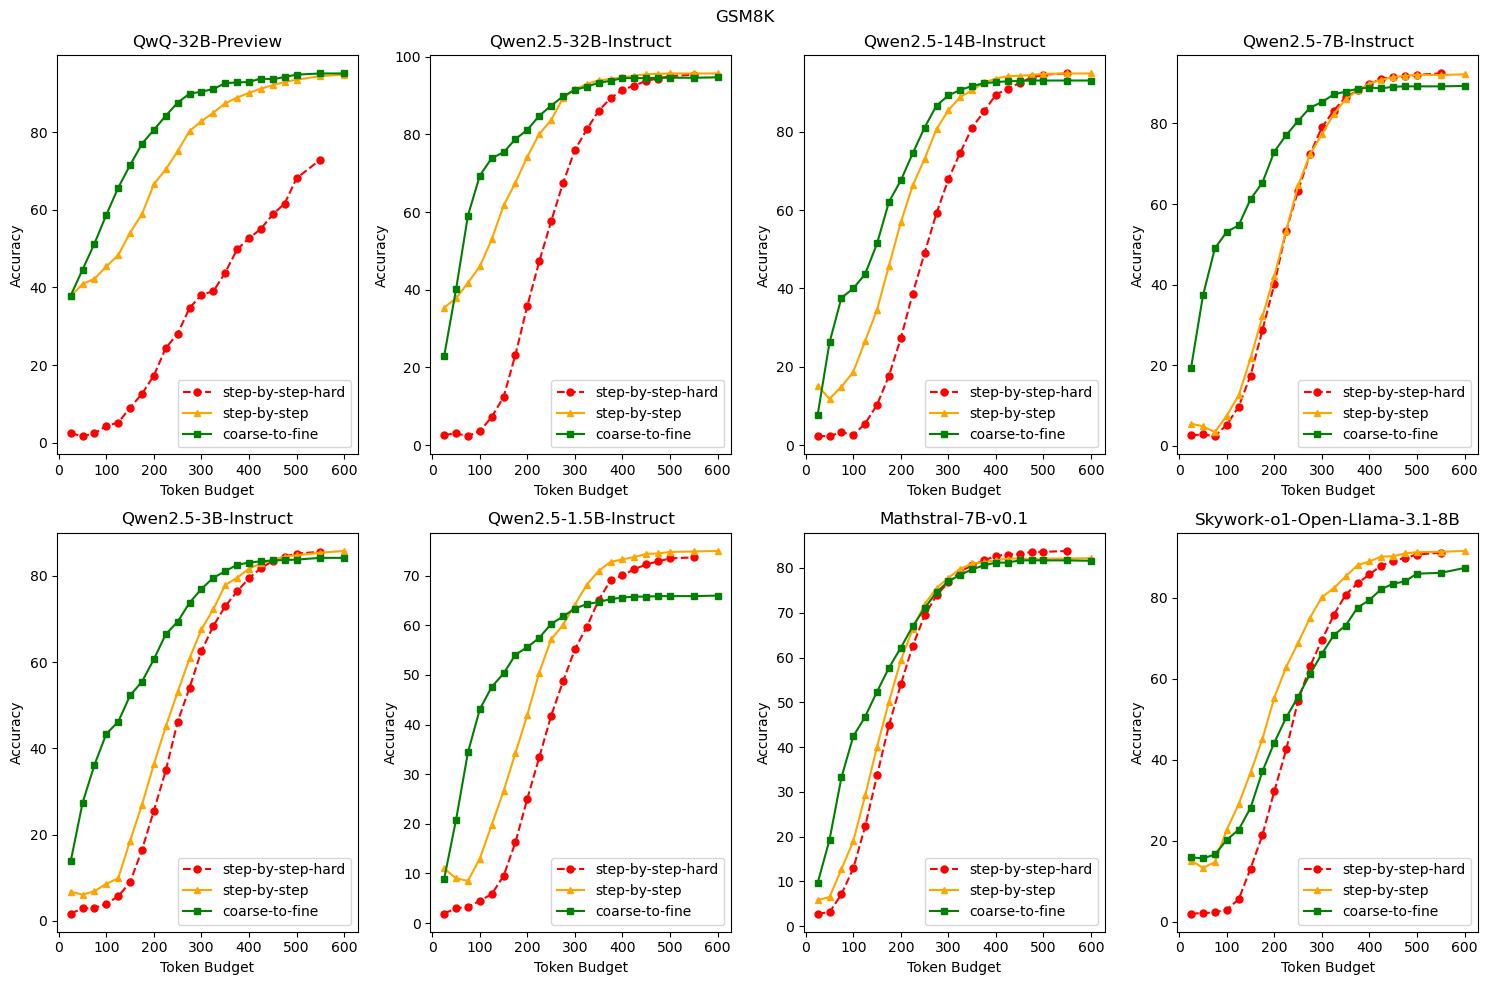

In [28]:
# Create a 2x3 subplot
fig, axs = plt.subplots(2, 4, figsize=(15, 10))
marker_size = 5  # Set the desired marker size

# Flatten the axes array for easy iteration
axs = axs.flatten()

# Plot all lines first without labels
for index, model in enumerate(model_list):
    if dataset == "gsm8k":
        axs[index].plot(budget_list[:-1], acc_lists_hard[index], marker='o', markersize=marker_size, 
                         linestyle='--', color="red", label="step-by-step-hard")
    else:
        axs[index].plot(budget_list, acc_lists_hard[index], marker='o', markersize=marker_size, 
                         linestyle='--', color="red", label="step-by-step-hard")
    axs[index].plot(budget_list, acc_lists_sbs[index], marker='^', markersize=marker_size, 
                     linestyle='-', color="orange", label="step-by-step")
    axs[index].plot(budget_list, acc_lists_c2f[index], marker='s', markersize=marker_size, 
                     linestyle='-', color="green", label="coarse-to-fine")
    axs[index].set_xlabel("Token Budget")
    axs[index].set_ylabel("Accuracy")
    axs[index].set_title(f"{model.split('/')[-1]}")
    axs[index].legend()

# set the title
plt.suptitle(f"{dataset}".upper())
# Adjust layout
plt.tight_layout()



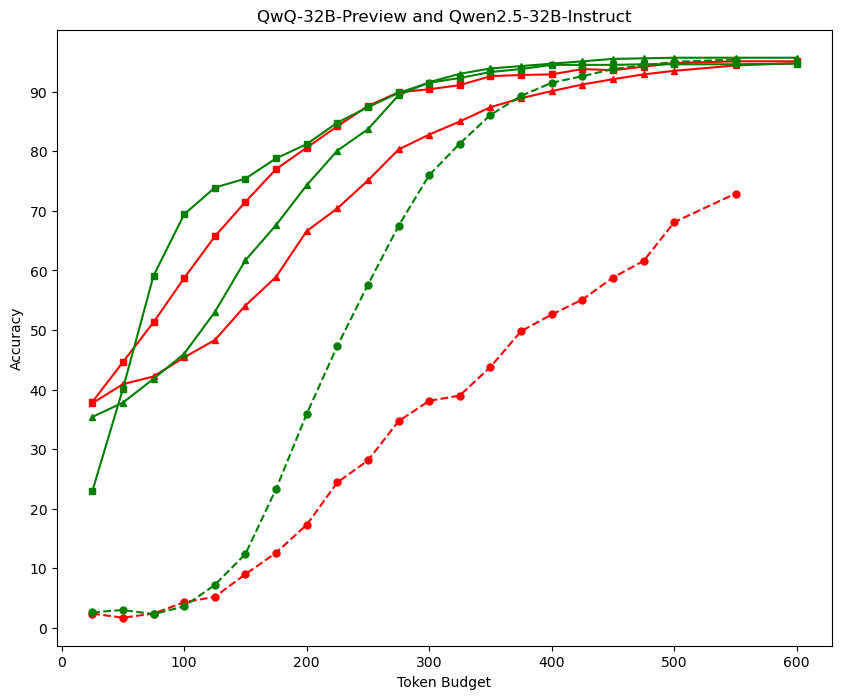

In [36]:
# plot 1 figure
plt.figure(figsize=(10, 8))

plt.plot(budget_list[:-1], acc_lists_hard[0], marker='o', markersize=marker_size, 
                         linestyle='--', color="red")
plt.plot(budget_list, acc_lists_sbs[0], marker='^', markersize=marker_size, 
                     linestyle='-', color="red")
plt.plot(budget_list, acc_lists_c2f[0], marker='s', markersize=marker_size, 
                     linestyle='-', color="red")
plt.plot(budget_list[:-1], acc_lists_hard[1], marker='o', markersize=marker_size, 
                         linestyle='--', color="green")
plt.plot(budget_list, acc_lists_sbs[1], marker='^', markersize=marker_size, 
                     linestyle='-', color="green")
plt.plot(budget_list, acc_lists_c2f[1], marker='s', markersize=marker_size, 
                     linestyle='-', color="green")
plt.xlabel("Token Budget")
plt.ylabel("Accuracy")
plt.title(f"{model_list[0].split('/')[-1]} and {model_list[1].split('/')[-1]}")
# 设置y的间隔是10
plt.yticks(np.arange(0, 100, 10))
# 红线是model 0，绿线是model 1，设置label

plt.show()
